In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 1)

In [11]:
facebook = web.DataReader('FB', 'yahoo', start, end)
facebook.head(200)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
...,...,...,...,...,...,...
2013-03-01,28.120001,26.809999,27.049999,27.780001,54064800,27.780001
2013-03-04,28.059999,27.440001,27.760000,27.719999,32400700,27.719999
2013-03-05,28.180000,27.209999,27.879999,27.520000,40622200,27.520000


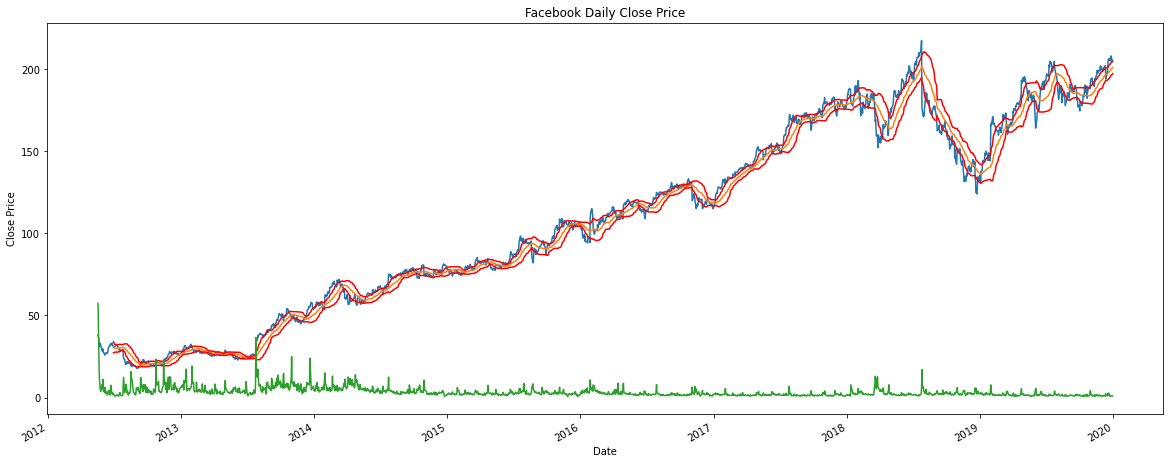

In [12]:
facebook['Close'].plot(figsize=(20,8))
plt.ylabel('Close Price')
plt.xlabel('Overwrite Date Index')
plt.title('Facebook Daily Close Price')
plt.grid(True)
period = 30
facebook['Open'].rolling(window=period).mean().plot()
(facebook['Open'].rolling(window=period).std() + facebook['Open'].rolling(window=period).mean()).plot(color = 'r')
(facebook['Open'].rolling(window=period).mean() - facebook['Open'].rolling(window=period).std()).plot(color = 'r')

plt.plot(facebook['Volume'] / 1e7)

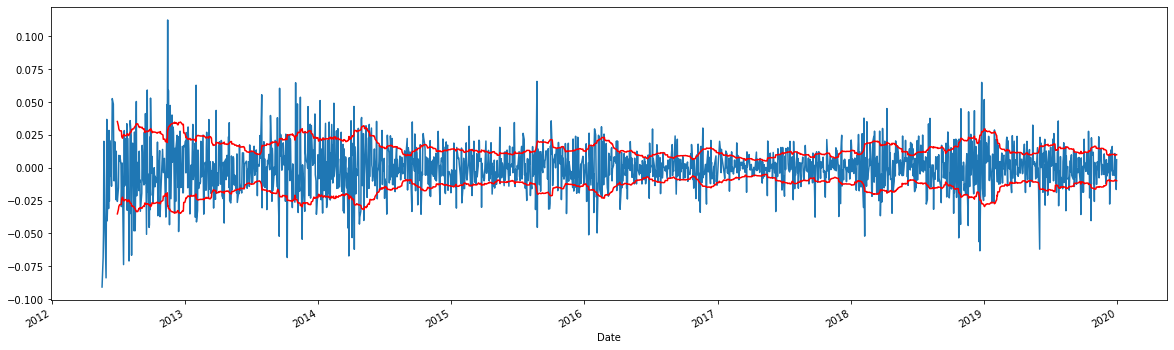

In [13]:
daily_diff = (facebook['Close'] - facebook['Open'])/facebook['Open']
daily_diff.plot(figsize = (20, 6))
plt.plot(daily_diff.rolling(30).std(), color = 'r')
plt.plot((-1) * daily_diff.rolling(30).std(), color = 'r')

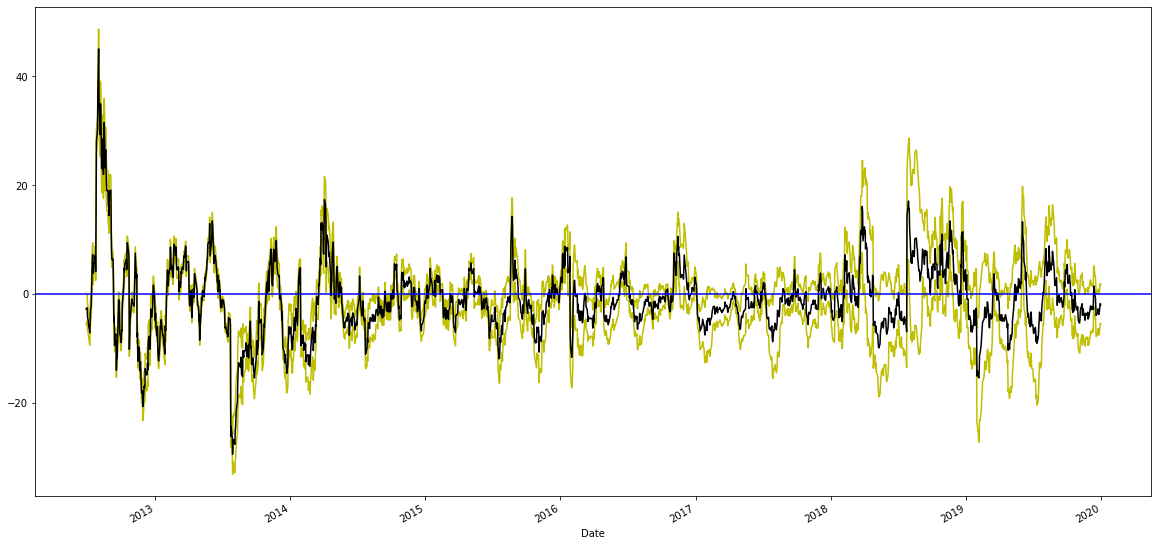

In [14]:
Var = (100*(facebook['Close'].rolling(window=period).mean() - facebook['Close'])/facebook['Close'])
(Var + facebook['Close'].rolling(window=period).std()).plot(figsize = (20, 10), color = 'y')
(Var - facebook['Close'].rolling(window=period).std()).plot(figsize = (20, 10), color = 'y')
(Var).plot(figsize = (20, 10), color = 'black')
plt.axhline(color = 'blue')